**Student ID: u6579712** 

**Student Name: Jieli Zheng**

**Task-2:  K-Means Clustering and Color Image Segmentation**
--

In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
# K mean clustering & its helper methods

# random pick initialization
def random_pick(image,centroid_num):
    # TODO
    X = image.reshape(-1, 1)
    return X[np.random.choice(len(X),centroid_num,replace=False)]


# k means ++ initialization
def kmeanspp(image,centroid_num):
    X = image.reshape(-1,1)
    m = centroid_num

    ans = []
    fst_index = np.random.randint(0, len(X))
    ans.append(X[fst_index])
    d = [0 for _ in range(len(X))]
    for _ in range(1, m):
        sum1 = float(0)
        for i, point in enumerate(X):
            _, d[i] = nearest_centroid(ans, point)
            sum1 += d[i]
        sum1 *= np.random.random()
        for i, a in enumerate(d):
            sum1 -= a
            if (sum1 > 0):
                continue
            if (check_duplicate(X[i], ans)):
                continue
            ans.append(X[i])
            break

    return np.array(ans)

# whether element is in an array
def check_duplicate(sample, arrs):
    for arr in arrs:
        if np.array_equal(sample, arr):
            return True
    return False


# find the index and distance of nearest centroid
def nearest_centroid(centroids,point):
    distance_min = np.inf
    ans_idx = -2
    for i,centroid in enumerate(centroids):
        distance = float(np.linalg.norm(centroid-point))
        if distance < distance_min:
            ans_idx = i
            distance_min=distance
    # which centroid it belongs to
    return ans_idx, distance_min

In [3]:
def my_kmeans_coords(image, centroid_num, using_kmeanspp=False,iteration_num=50):
    """
    my k-mean clustering algorithm as well as some adv args
    :param image: np array of 3 channels
    :param centroid_num: number of centroids
    :param using_kmeanspp: whether to use k-means++ when initialization
    :param iteration_num: number of iterations, default 10
    :return: final clusters
    """
    clusters = dict()
    image_shape = image.shape
    assignments = np.zeros(image_shape[:2])
    assignments -= 2
    # initialize
    images_coords = []
    for i in range(image_shape[0]):
        tmp = []
        for j in range(image_shape[1]):
            tmp.append([i, j])
        images_coords.append(tmp)

    images_coords = np.array(images_coords)
    images_coords = images_coords.transpose(2, 0, 1)
    data_points = np.vstack([image.transpose(2, 0, 1), images_coords])
    data_points = data_points.transpose(1, 2, 0)

    if using_kmeanspp:
        centroids = kmeanspp(data_points,centroid_num)
    else:
        centroids = random_pick(data_points,centroid_num)


    # main iterations:
    for i in range(iteration_num):

        clusters = dict()
        for m in range(centroid_num):
            clusters[m] = []

        # E - step
        for j, row in enumerate(image):
            for k, channels in enumerate(row):
                point = np.hstack((channels,j,k))
                current_idx,_ = nearest_centroid(centroids,point)
                assignments[j][k] = current_idx
                # record assignments
                clusters[current_idx].append(point)

        # M - step
        # re-generate new centroids by the mean of points in cluster
        new_centroids = []
        for centroid_idx, points in clusters.items():
            if points:
                current_new_centroid = np.mean(points, axis=0)
            else:
                # remain
                current_new_centroid = centroids[centroid_idx]
            new_centroids.append(current_new_centroid)
        centroids = np.array(new_centroids)

    return clusters

In [4]:
def my_kmeans_no_coords(image, centroid_num, using_kmeanspp=False,iteration_num=50):
    """
    my k-mean clustering algorithm as well as some adv args
    :param image: np array of 3 channels
    :param centroid_num: number of centroids
    :param using_kmeanspp: whether to use k-means++ when initialization
    :param iteration_num: number of iterations, default 10
    :return: final clusters
    """
    clusters = dict()
    image_shape = image.shape
    assignments = np.zeros(image_shape[:2])
    assignments -= 2
    # initialize
    if using_kmeanspp:
        centroids = kmeanspp(image,centroid_num)
    else:
        centroids = random_pick(image,centroid_num)


    # main iterations:
    for i in range(iteration_num):

        clusters = dict()
        for m in range(centroid_num):
            clusters[m] = []

        # E - step
        for j, row in enumerate(image):
            for k, channels in enumerate(row):
                point = channels
                current_idx,_ = nearest_centroid(centroids,point)
                assignments[j][k] = current_idx
                # record assignments
                clusters[current_idx].append(point)

        # M - step
        # re-generate new centroids by the mean of points in cluster
        new_centroids = []
        for centroid_idx, points in clusters.items():
            current_new_centroid = np.mean(points, axis=0)
            new_centroids.append(current_new_centroid)
            # print(centroid_idx, np.array(points).shape,current_new_centroid)
        centroids = np.array(new_centroids)

    return clusters,assignments

In [5]:
 # load image
mandm_pth = os.path.join("mandm.png")
peppers_pth = os.path.join("peppers.png")

mandm_image = cv2.imread(mandm_pth)
mandm_image = cv2.cvtColor(mandm_image, cv2.COLOR_BGR2LAB)
print(f"mandm size {mandm_image.shape}")


peppers = cv2.imread(peppers_pth)
peppers = cv2.cvtColor(peppers, cv2.COLOR_BGR2LAB)
print(f"peppers size {peppers.shape}")

mandm size (394, 451, 3)
peppers size (384, 512, 3)


**using coordinates for clustering** 

IMAGE mandm

In [23]:
#  W/ COORDS
# cluster with coords and without kmeans++
ans_clusters = my_kmeans_coords(mandm_image,14,using_kmeanspp=True)
# visualize
clustered_image = np.zeros(mandm_image.shape)
clustered_image -= 1
clustered_image = clustered_image.astype(np.uint8)
for centroid_idx, points in ans_clusters.items():
    if points:
#         print(np.array(points).shape)
        centroid_mean = np.mean(points,axis=0)
        L,a,b,_,_ = centroid_mean
        centroid_Lab = np.array([L, a, b]).astype(np.uint8)
        for _,_,_,x,y in points:
            clustered_image[x][y] = centroid_Lab


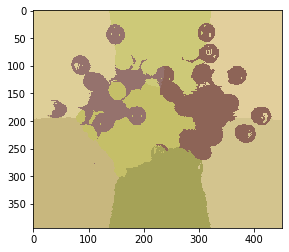

In [24]:
clustered_image = cv2.cvtColor(clustered_image,cv2.COLOR_LAB2RGB)
plt.imshow(clustered_image)
plt.show()

IMAGE peppers

In [25]:
# cluster with coords and without kmeans++
ans2_clusters = my_kmeans_coords(peppers,14,using_kmeanspp=True)
# visualize
clustered_image2 = np.zeros(peppers.shape)
clustered_image2 -= 1
clustered_image2 = clustered_image2.astype(np.uint8)
print(len(ans2_clusters.keys()))
for centroid_idx, points in ans2_clusters.items():
    if points:
        print(np.array(points).shape)
        centroid_mean2 = np.mean(points,axis=0)
        L,a,b,_,_ = centroid_mean2
        centroid_Lab2 = np.array([L, a, b]).astype(np.uint8)
        for _,_,_,x,y in points:
            clustered_image2[x][y] = centroid_Lab2

14
(20756, 5)
(18706, 5)
(22960, 5)
(16464, 5)
(16434, 5)
(15631, 5)
(23122, 5)
(21638, 5)
(24843, 5)
(16054, 5)


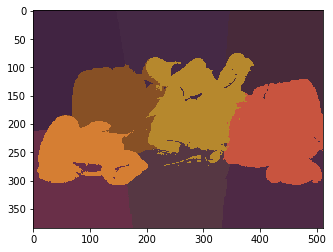

In [26]:
clustered_image2 = cv2.cvtColor(clustered_image2,cv2.COLOR_LAB2RGB)
plt.imshow(clustered_image2)
plt.show()

**not using coordinates for clustering**

IMAGE mandm

In [10]:
#  W/O COORDS
ans_clusters_no_coord, ans_assignments = my_kmeans_no_coords(mandm_image, 7, using_kmeanspp=True)
# print(ans_assignments)
# visualize
clustered_image_no_coord = np.zeros(mandm_image.shape)
clustered_image_no_coord -= 1
clustered_image_no_coord = clustered_image_no_coord.astype(np.uint8)
# calculate the mean colour of each cluster
cluster_mean_colour = dict()
for centroid_idx, points in ans_clusters_no_coord.items():
    if points:
        centroid_mean = np.mean(points,axis=0)
        centroid_Lab = np.array(centroid_mean).astype(np.uint8)
        cluster_mean_colour[centroid_idx] = centroid_Lab

for x,row in enumerate(ans_assignments):
    for y,cluster_idx in enumerate(row):
        clustered_image_no_coord[x][y] = cluster_mean_colour[cluster_idx]

print(type(clustered_image_no_coord[0][0][0]))
    

<class 'numpy.uint8'>


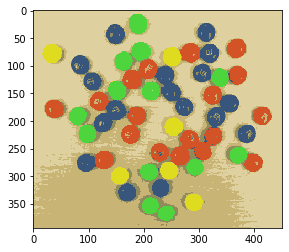

In [11]:
clustered_image_no_coord = cv2.cvtColor(clustered_image_no_coord, cv2.COLOR_LAB2RGB)
plt.imshow(clustered_image_no_coord)
plt.show()

IMAGE peppers

In [12]:
ans_clusters_no_coord, ans_assignments = my_kmeans_no_coords(peppers, 7, using_kmeanspp=True)
# print(ans_assignments)
# visualize
clustered_image_no_coord = np.zeros(peppers.shape)
clustered_image_no_coord -= 1
clustered_image_no_coord = clustered_image_no_coord.astype(np.uint8)
# calculate the mean colour of each cluster
cluster_mean_colour = dict()
for centroid_idx, points in ans_clusters_no_coord.items():
    if points:
        centroid_mean = np.mean(points,axis=0)
        centroid_Lab = np.array(centroid_mean).astype(np.uint8)
        cluster_mean_colour[centroid_idx] = centroid_Lab

for x,row in enumerate(ans_assignments):
    for y,cluster_idx in enumerate(row):
        clustered_image_no_coord[x][y] = cluster_mean_colour[cluster_idx]

print(type(clustered_image_no_coord[0][0][0]))

<class 'numpy.uint8'>


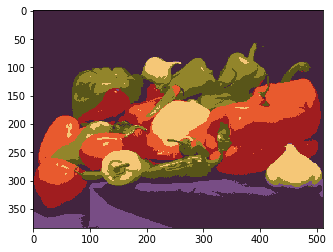

In [13]:
clustered_image_no_coord = cv2.cvtColor(clustered_image_no_coord, cv2.COLOR_LAB2RGB)
plt.imshow(clustered_image_no_coord)
plt.show()